In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [7]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [10]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

In [11]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [12]:
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 19s 6ms/step - loss: 1.6343 - accuracy: 0.4051 - val_loss: 1.4179 - val_accuracy: 0.4879
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3498 - accuracy: 0.5170 - val_loss: 1.2812 - val_accuracy: 0.5415
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2189 - accuracy: 0.5675 - val_loss: 1.2239 - val_accuracy: 0.5587
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1205 - accuracy: 0.6012 - val_loss: 1.1700 - val_accuracy: 0.5855
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0496 - accuracy: 0.6297 - val_loss: 1.1146 - val_accuracy: 0.6094
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9856 - accuracy: 0.6515 - val_loss: 1.1083 - val_accuracy: 0.6125
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9290 - accuracy: 0.6718 - val_loss: 1.0852 - v

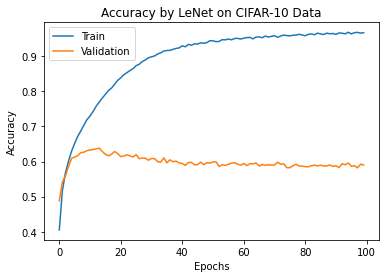

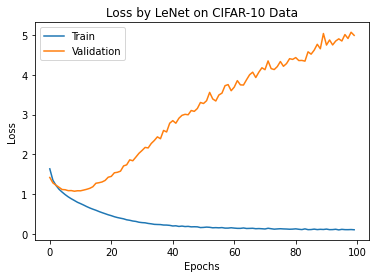

In [13]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 2ms/step


array([[618,  36,  64,  32,  28,  21,  11,  24, 115,  51],
       [ 24, 740,  12,  17,   7,  10,  12,   8,  43, 127],
       [ 69,  21, 495,  76,  77, 110,  53,  55,  21,  23],
       [ 25,  27,  83, 397,  61, 215,  67,  63,  23,  39],
       [ 32,  10, 114,  90, 441,  80,  75, 125,  12,  21],
       [ 18,   8,  75, 200,  39, 523,  38,  70,  13,  16],
       [ 12,  23,  82, 102,  40,  76, 615,  13,  21,  16],
       [ 25,   7,  37,  65,  68,  95,   8, 664,   8,  23],
       [ 77,  55,  11,  22,  12,  16,  14,   9, 737,  47],
       [ 33, 142,  13,  30,  11,  23,   9,  29,  38, 672]])

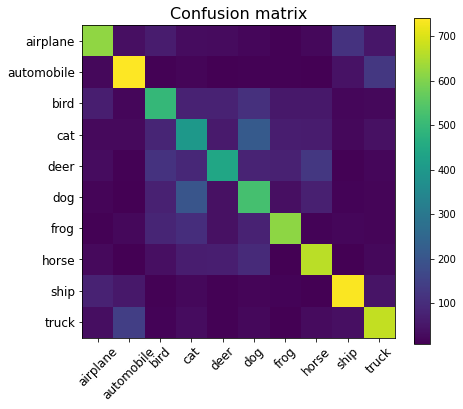

In [16]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [17]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.5902


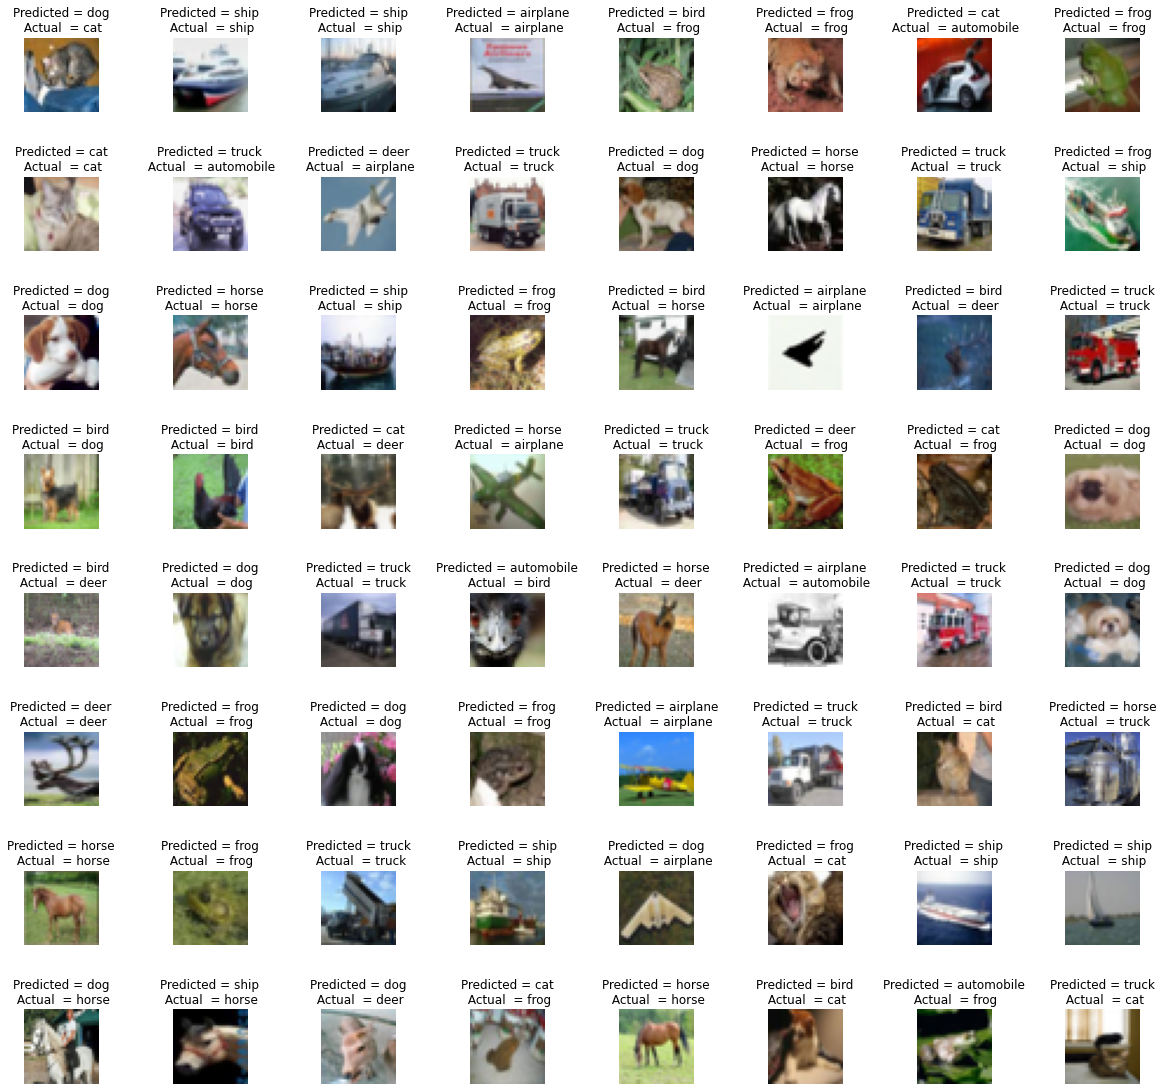

In [19]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [21]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 60)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 60)          32460     
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 30)         

In [22]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 13s 7ms/step - loss: 2.3008 - accuracy: 0.1261 - val_loss: 2.2969 - val_accuracy: 0.1592
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 2.2508 - accuracy: 0.1689 - val_loss: 2.0838 - val_accuracy: 0.1888
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0630 - accuracy: 0.2030 - val_loss: 1.9858 - val_accuracy: 0.2479
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9620 - accuracy: 0.2432 - val_loss: 1.8994 - val_accuracy: 0.2673
Epoch 5/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8372 - accuracy: 0.2937 - val_loss: 1.7347 - val_accuracy: 0.3369
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7364 - accuracy: 0.3400 - val_loss: 1.6792 - val_accuracy: 0.3651
Epoch 7/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6608 - accuracy: 0.3721 - val_loss: 1.5935 -

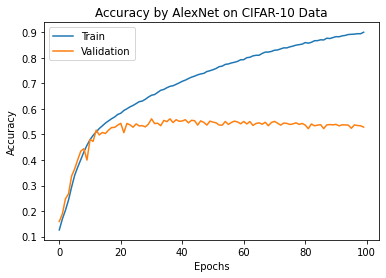

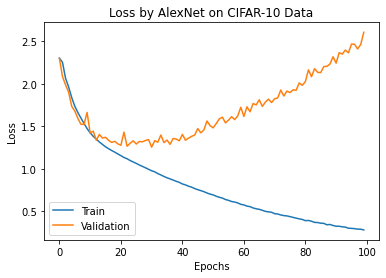

In [23]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [24]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 2ms/step


array([[602,  33,  72,  21,  47,   4,  25,  24, 118,  54],
       [ 56, 560,  19,  13,  13,   4,  42,  11,  50, 232],
       [ 56,   3, 441,  74, 148,  69, 110,  50,  26,  23],
       [ 31,  13, 104, 367,  97, 139, 148,  43,  15,  43],
       [ 34,   4, 139,  64, 488,  32, 149,  68,  12,  10],
       [ 18,   6,  85, 240, 110, 331, 112,  70,  13,  15],
       [  8,   9,  78,  66,  88,  14, 709,   9,   7,  12],
       [ 34,   7,  51,  74, 138,  65,  38, 538,   9,  46],
       [123,  51,  45,  29,  25,   3,  19,   5, 641,  59],
       [ 58, 111,  28,  24,  19,  16,  33,  26,  75, 610]])

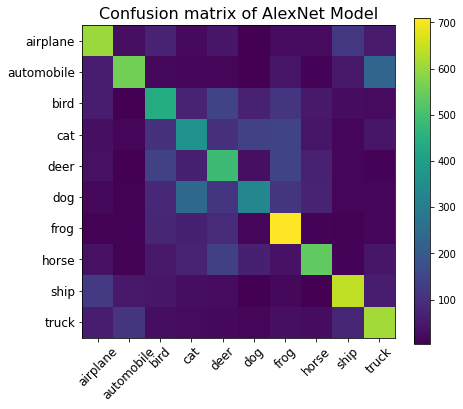

In [25]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [26]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

Test accuracy by AlexNet: 0.5902


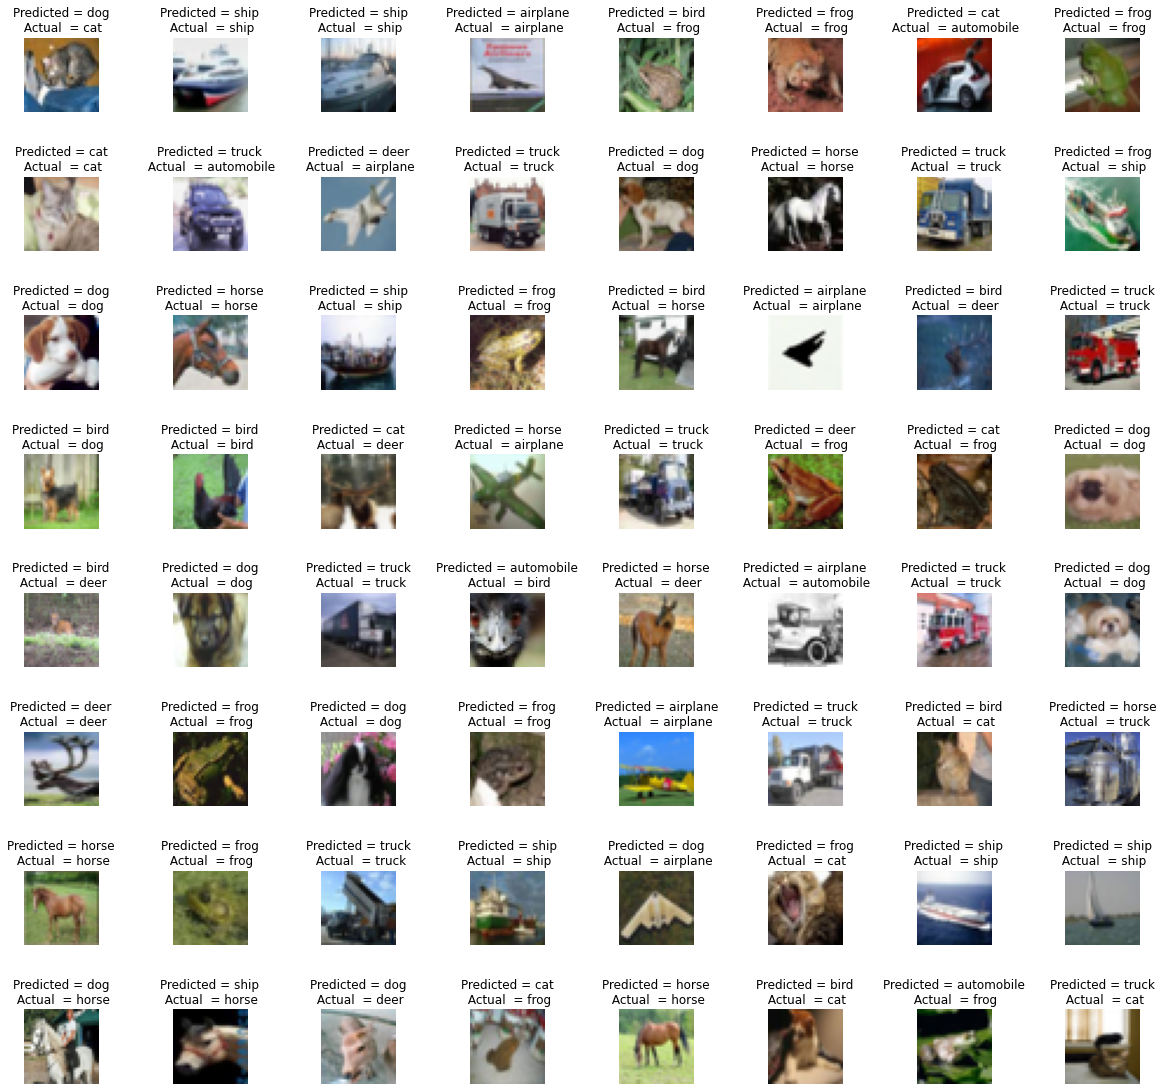

In [27]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)